# Рудаков Кирилл
## Практическое задание № 2

### ⌦1
✔︎Были оценены возможности Sculpting, в Wizard->Demo->Sculpting

### ⌦2
Найдем водородные связи, которыми белок связывает лиганд.

In [2]:
import time
import __main__
import os
import pymol
__main__.pymol_argv = [ 'pymol', '-cp' ]
pymol.finish_launching()
from pymol import cmd
from IPython.display import Image, display, HTML

In [54]:
def prepareImage(width=800, height=500, sleep=1, filename='img.png'):
    cmd.ray(width, height)
    cmd.png(filename)
    time.sleep(sleep)

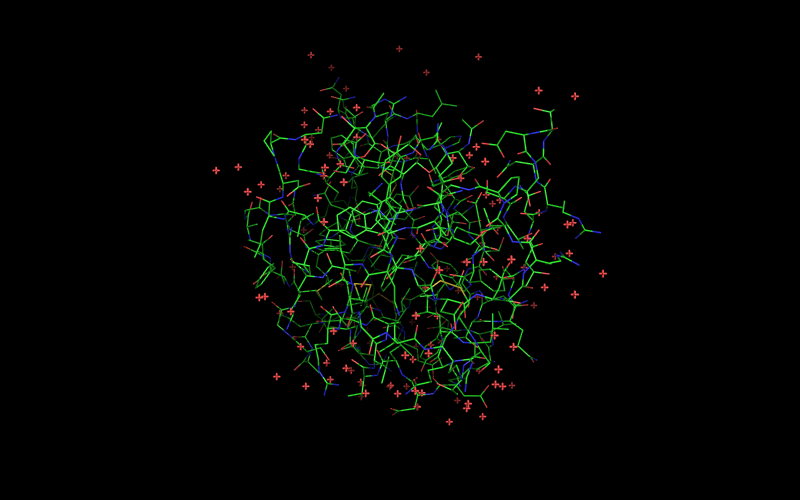

In [56]:
cmd.reinitialize()
cmd.fetch("1LMP", async=0)
prepareImage()
Image('img.png')

### Убираемм атомы воды и добавляем водороды

In [57]:
cmd.remove("solvent")
cmd.extract("ligands", "het")
cmd.show_as('sticks', 'ligand')
cmd.h_add('all') 
cmd.distance('hbonds', 'all', 'ligand', 3.2, 2)

2.889749526977539

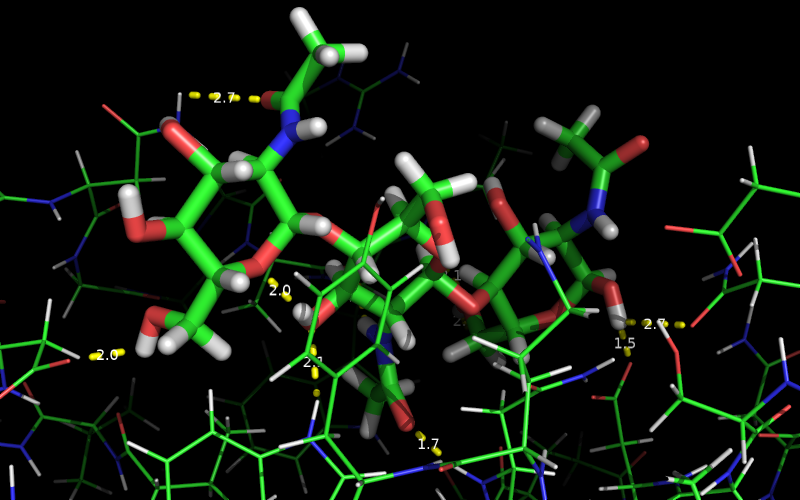

In [58]:
prepareImage()
Image('img.png')

Связи между лигандом и активным центром белка могут быть как нековалентными (ионными, водородными, гидрофобными), так и ковалентными. Часто активный центр формируется таким образом, что доступ воды к функциональным группам его радикалов ограничен, т.е. создаются условия для связывания лиганда с радикалами аминокислот.

### ⌦3

TYR->LEU

In [61]:
cmd.color('purple','resi 62')
cmd.label('n. CA and i. 62', 'resn, resi')

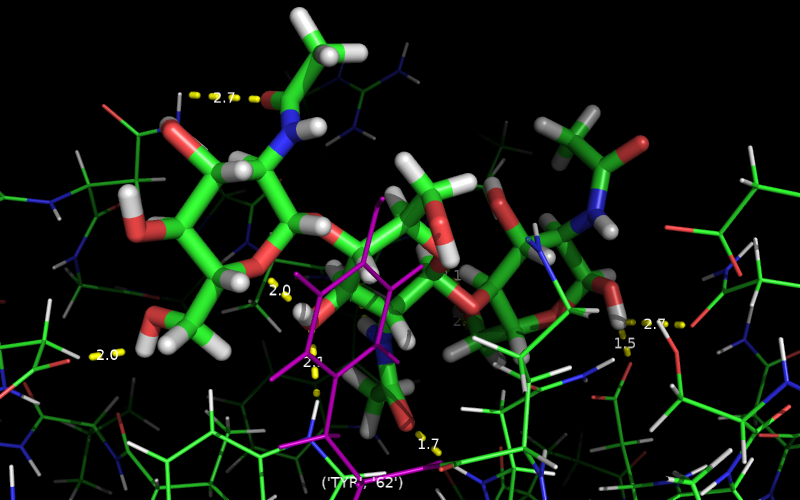

In [62]:
prepareImage()
Image('img.png')

In [63]:
cmd.wizard("mutagenesis")
cmd.do("refresh_wizard")
cmd.get_wizard().set_mode("LEU")
cmd.get_wizard().do_select("62/")
cmd.get_wizard().apply()

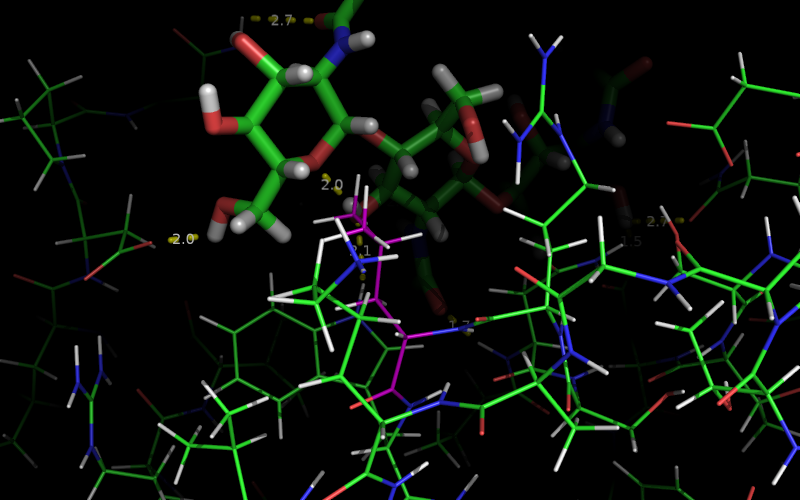

In [64]:
prepareImage()
Image('img.png')

In [69]:
cmd.select('active_site', '1lmp within 3.2 of ligand')
cmd.label('active_site', 'resn, resi')
cmd.set('label_color', 'yellow', 'active_site')

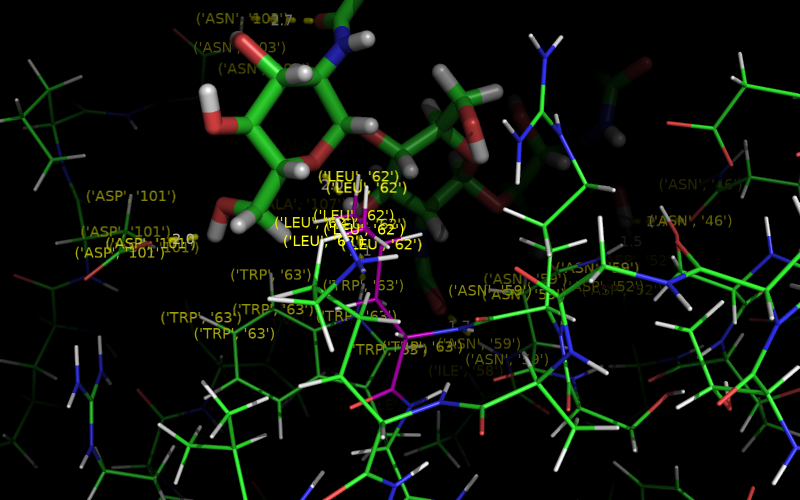

In [70]:
prepareImage()
Image('img.png')